In [1]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [2]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 68 kB 2.6 MB/s 
     |████████████████████████████████| 255.9 MB 31 kB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
     |████████████████████████████████| 2.0 MB 45.3 MB/s 


In [3]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [4]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saranshhhh
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 78.1MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [5]:

os.listdir('rossmann-store-sales')

['test.csv', 'store.csv', 'sample_submission.csv', 'train.csv']

In [6]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [7]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [11]:
# To start with, It will be very useful if the store information is present in test and the train dataset
# so we'll merge the train and test dataset with the store dataset.
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')
# We are merging store dataset on ross_df and test_df.
# "how='left'":means we're performing leftouter join with key="Store"

In [12]:
merged_df
# this is how our merger dataset looks like.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN




```
Feature Engineering
```



In [13]:
merged_df.info()
# it is good idea to get the information about the dataset before working on it.
# Ex. looking at the info. we can say that our dataset has missing values, so we have to deal with the NAN values. etc etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
# by default when we import dataset, the date time coloumn is read as object so we've to convert it into date time object
# since it will be useful in both train and test dataset, we're creating a function, which will extract the date and time and append it into our dataset
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

# this is also called feature engineering. i.e. the string will not help us in training so we've ectracted info out of it for our use.

In [15]:
split_date(merged_df)
split_date(merged_test_df)

In [16]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [17]:
merged_df[merged_df.Open == 0].Sales.value_counts()
# "value_counts": returns the total values for the particular coloumn. i.e. we're couting the sales here. when store is closed.

0    172817
Name: Sales, dtype: int64

In [18]:
merged_df = merged_df[merged_df.Open == 1].copy()
# thinking logically, if the store is closed then there will be no sales on that day, thus it is of no use in our training set,
# so we'll remove it.
# "merged_df.Open == 1" this will select all the days when the store was open. 
#"merged_df[merged_df.Open == 1]": this will select all those rows of the above data and we're storing a copy to our merged training set



```
Advance feature engineering
```



In [19]:
# if we look into our dataset, 
# we've "CompetitionOpenSinceMonth","CompetitionOpenSinceYear"	this tells us that when was the competion store was first opened.
# So when we're computing our model for a particular day, it will be much useful if we know since when the competition was opened from that day.
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)
# this function is computing the months for since when the competition was opened from that day.
# Since we are training our model from the past and predicting the future, so if the competition will open in the future from a particular day
# our func, will return the -ve values so to avoid that, 2nd line of the function is converting all the -ve values to 0.
# and we're filling the missing values with 0 too.


In [20]:
comp_months(merged_df)
comp_months(merged_test_df)

In [21]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [22]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
841874,2013-06-07,2890.0,2007.0,12.0,66.0
516885,2014-03-25,680.0,2005.0,7.0,104.0
168203,2015-03-03,390.0,2013.0,2.0,25.0
452824,2014-05-22,850.0,2012.0,2.0,27.0
54970,2015-06-12,190.0,2014.0,7.0,11.0
419768,2014-06-20,6360.0,2010.0,12.0,42.0
946141,2013-03-05,1100.0,2009.0,6.0,45.0
124551,2015-04-11,3210.0,2009.0,6.0,70.0
649377,2013-11-26,3580.0,2012.0,9.0,14.0
299887,2014-10-25,36410.0,2008.0,4.0,78.0


In [23]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
# The above function is detecting if the day on which we're performing our analysis lies in the promo2 month or not.
# If yes it'll show "1" else "0".

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [24]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [25]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)
# If we look at the dataset now then we can find that "Promo2", "Promo2SinceYear", "Promo2SinceWeek", "PromoInterval" these coloumns are
# now not very useful for as because we have extracted the info out of them which we need for analysis
# i.e. now we know, for a particular date, whether a promotion is going on or not and we know, since when promotion started from that date


,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
649297,2013-11-26,0,NaN,NaN,NaN,0.000000,0
953762,2013-02-26,0,NaN,NaN,NaN,0.000000,0
725337,2013-09-19,1,2009.0,37.0,"Jan,Apr,Jul,Oct",48.229508,0
624437,2013-12-19,0,NaN,NaN,NaN,0.000000,0
301452,2014-10-23,0,NaN,NaN,NaN,0.000000,0
26392,2015-07-08,1,2011.0,14.0,"Jan,Apr,Jul,Oct",51.213115,1
1006754,2013-01-10,1,2012.0,1.0,"Jan,Apr,Jul,Oct",12.229508,1
395805,2014-07-14,1,2011.0,18.0,"Feb,May,Aug,Nov",38.524590,0
1010066,2013-01-07,0,NaN,NaN,NaN,0.000000,0
936756,2013-03-14,1,2011.0,18.0,"Jan,Apr,Jul,Oct",22.393443,0


In [26]:
merged_df.columns
# These are the total coloumns we have now.

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [27]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
# Since We've extracted year month day, etc from "Date" we don't want that in our input cols.
# similarly from 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear': We've extracted competitionopen
# From 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval': We've extracted promo2open and ispromo2month
target_col = 'Sales'

In [28]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()
# We're calling the input_cols from the dataset and creating their copy named: "inputs", Sim. for the targets.


In [29]:
test_inputs = merged_test_df[input_cols].copy()
# Not creating the target because we need to predict them

In [30]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

# categorzing continous and categorical columns

In [31]:
inputs[numeric_cols].isna().sum()
# this will return the total no. of empty values in every numeric column.
#"isna()" is a boolean func.

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [32]:
test_inputs[numeric_cols].isna().sum()


Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [33]:
# So we can observe that only competitionDistance has missing values.
# competitionDistance: this tells the distance between our shop and the competitors shop.
# When we're solving for the real world data, we need to think why the value be possibily NAN,
# here Nan means that there is no competition for that particular locality on that particular date when we're computing.
# So if we replace NAN with "0": It means that competition is next door which would lead us to the wrong path
# so here we're taking the max competitionDistance from the dataset, doubling it, and replacing the nan values with it.
max_distance = inputs.CompetitionDistance.max()

In [34]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
# "inplace=True": means we're modifying and putting it back into the dataset.

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])
# since our model will perform alot of computations, we don't want any feature to dominate for predicting the final result. 
# so to give every feature equal oppotunity we'll scale then between the range 0 to 1.

In [37]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [38]:
from sklearn.preprocessing import OneHotEncoder

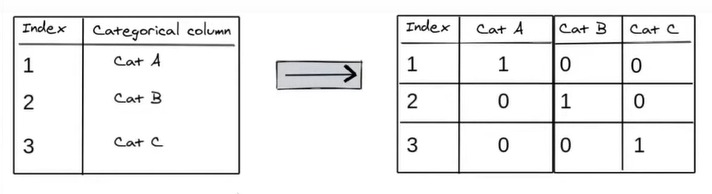

In [39]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
# since categorical coloumns cannot help in model training, we need to convert them into continous values
# so OneHotEncoding creates additional coloumns depicting the values in 0 and 1. 0 means that, on that day some particular categorical values was not there, and 1 viceversa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [41]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]
# finally we're done with the data preperations and we're calling all the meaningful values from the orifinal dataset,
# "X": final processed training dataset.
# "X_test": final test set



```
Working of the GBM Model
1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to predict just the residuals for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions from the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The question might arrise why are we using Learning rate? 
So if we directly put the residual back to our model and predict the the new output, it may lead to over fitting. 
So inshort LR is used to prevent overfitting in the model
Define LR mechanism too
```





```
Why it is called gradient boosting?
Gb is the general term we use when we improve our existing model by improving the predictions our model performs. 

gradient means we're trying to minimize the loss, so this kind of iterative gradient descent. We're creating DT from the previous 
dt to minimize the loss.
```



In [42]:
from xgboost import XGBRegressor
# To train a GBM we're using XGBRegressor from xgboost, there is also a library in skitlearn for gradient boosting but "xgboost is far more versatile and efficient".

In [43]:
#?XGBRegressor

In [44]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
# "random_state=42": our DT will have max 42 states. this ensures that everytime we train this model it will give the exact same result.
# "n_jobs": it is used to invoke the threads for the processing. "-1" means that we're invoking all the threads.
# "n_estimators": means we're training 20 Dt with depth 4.

In [45]:
%%time
model.fit(X, targets)
# we're calling our model on train set

CPU times: user 34.9 s, sys: 266 ms, total: 35.2 s
Wall time: 18.3 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [46]:
preds = model.predict(X)

In [47]:
preds

array([ 8127.9404,  7606.919 ,  8525.857 , ...,  6412.8247,  9460.068 ,
       10302.145 ], dtype=float32)

In [48]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
# to calculate the error we're using RMSE values. for this we imported "mean_squared_error" from skit metrics.
# "squared=False" It means that rmse func. will return root mean squared error. By default it is True in that case it returns MSE.

In [49]:
rmse(preds, targets)
# RMSE as 2377 is not bad neither good. so why Does our model performed a bit well with 20 trees of depth?
# this is because our model is learning from its previous outputs and we are reducing each time what are tree needs to learn instead of learning from from the scratch
# as in case of random forest but in this case DT just tries to fix the errors of the previous DT

2377.752008804669

In [50]:
merged_df.Sales.min() , merged_df.Sales.max()

(0, 41551)

In [51]:
#show the sales using historgram

In [52]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30
# we can visualize individual trees using plot_tree from xgboost

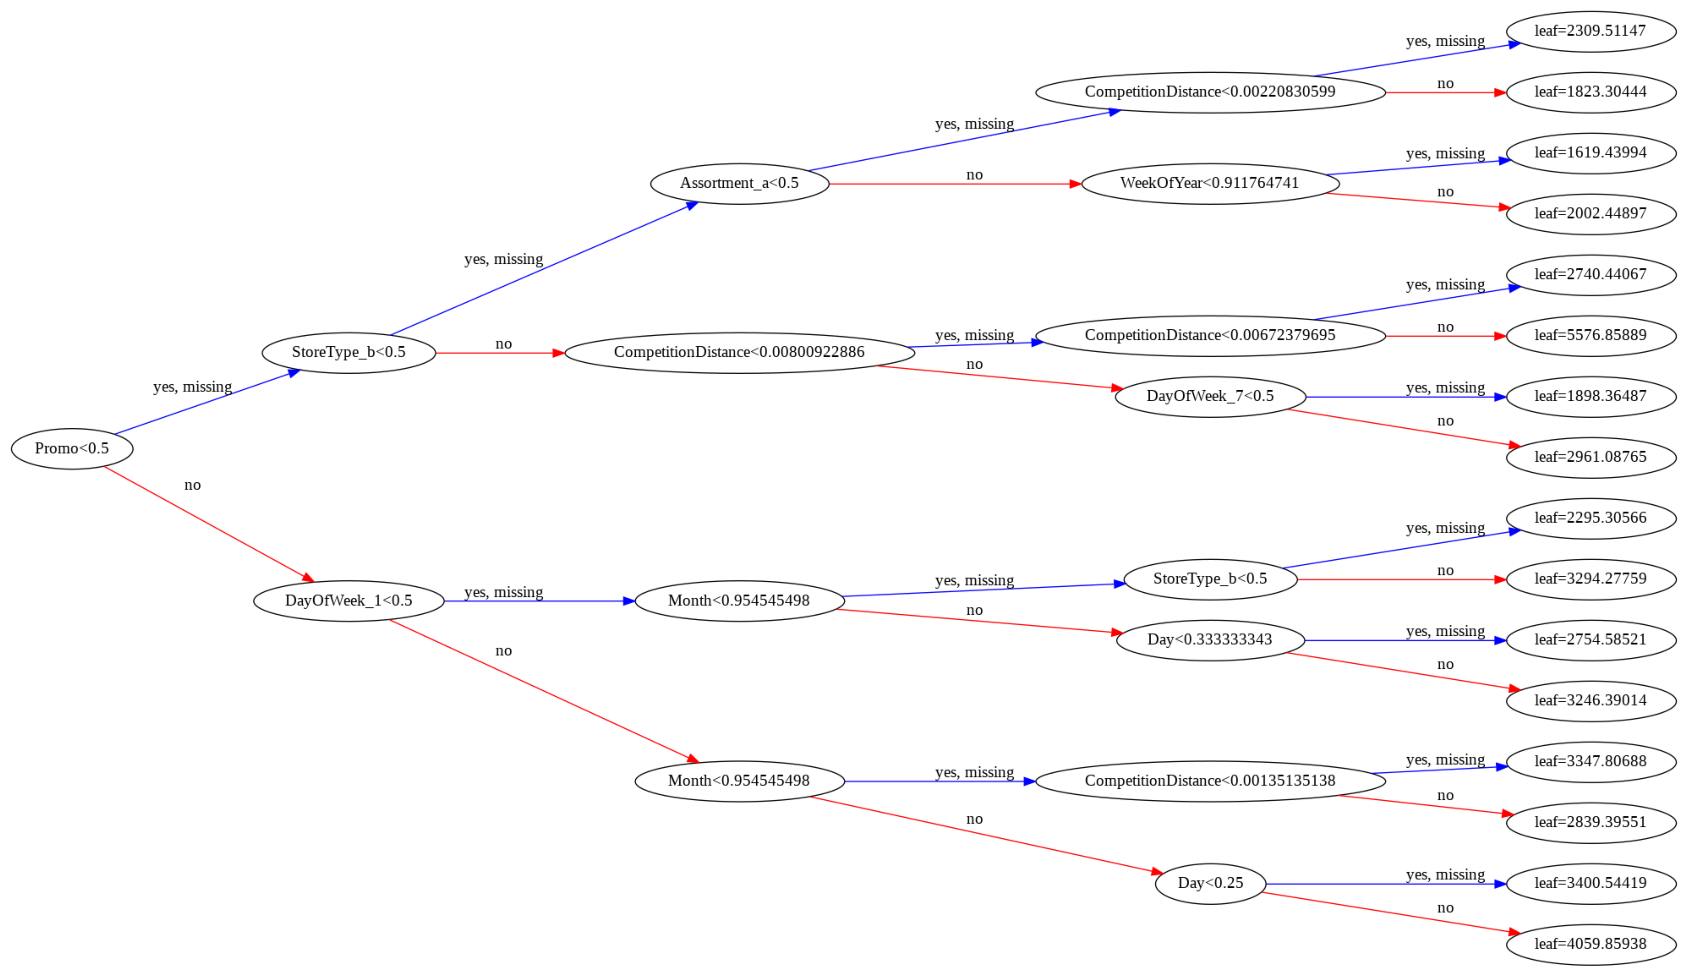

In [53]:
plot_tree(model, rankdir='LR');

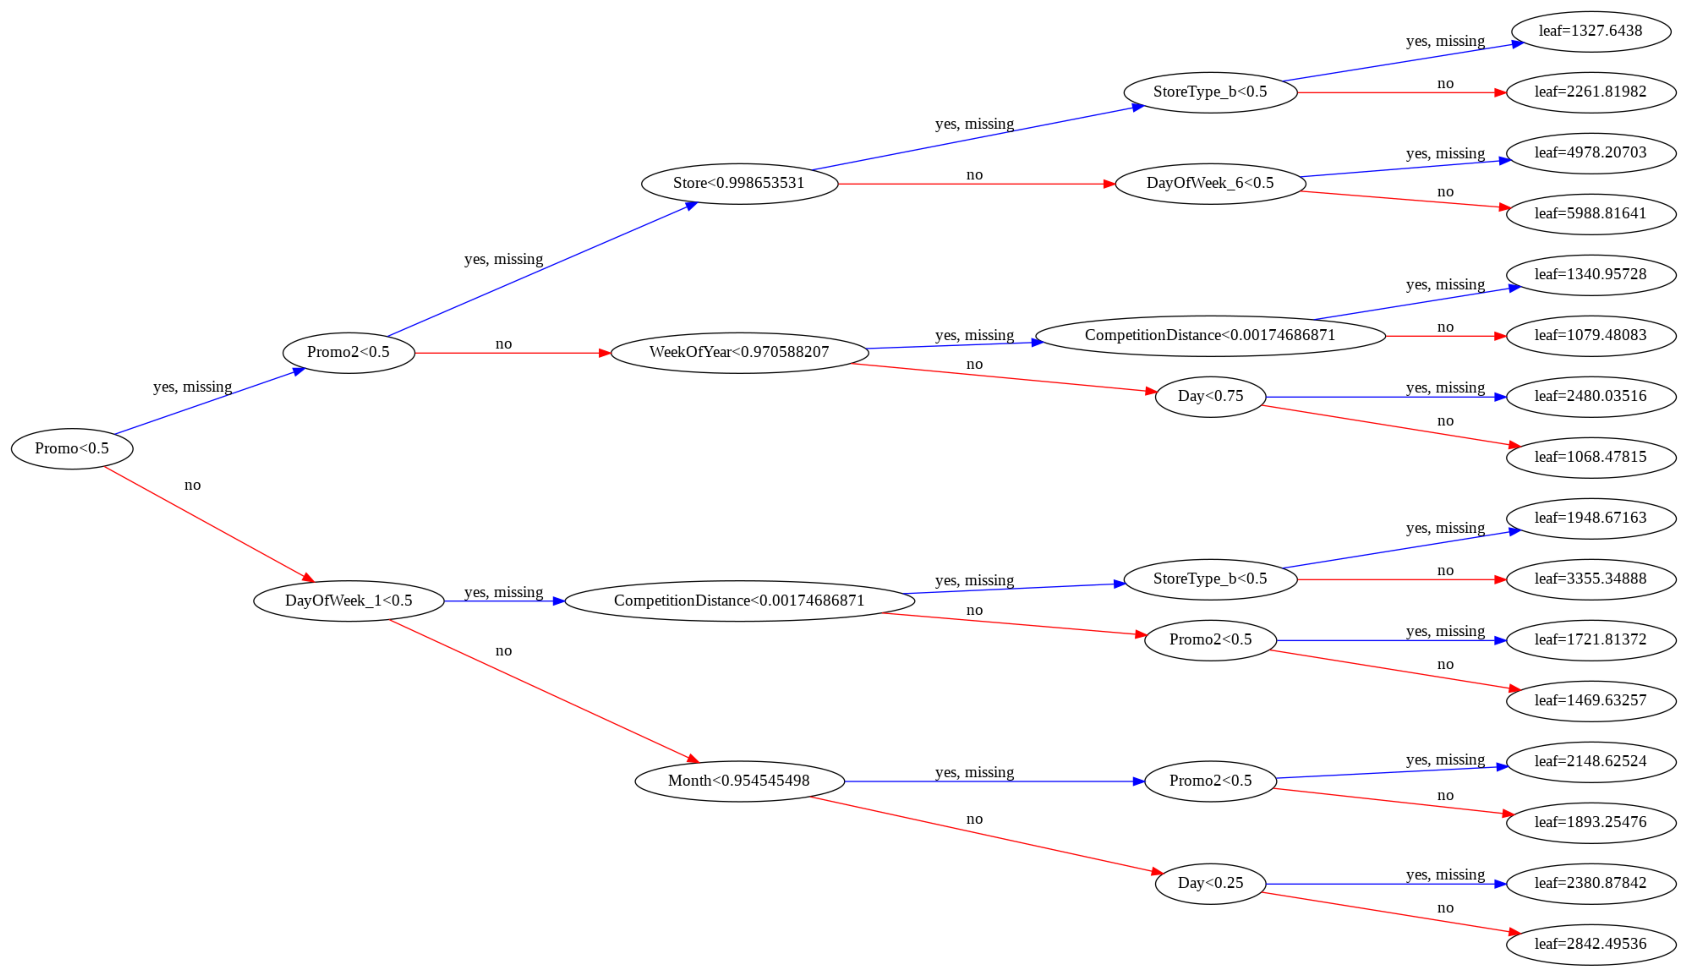

In [54]:
plot_tree(model, rankdir='LR', num_trees=1);
# "num_trees": this tells which tree to plot. we're plotting left to right.

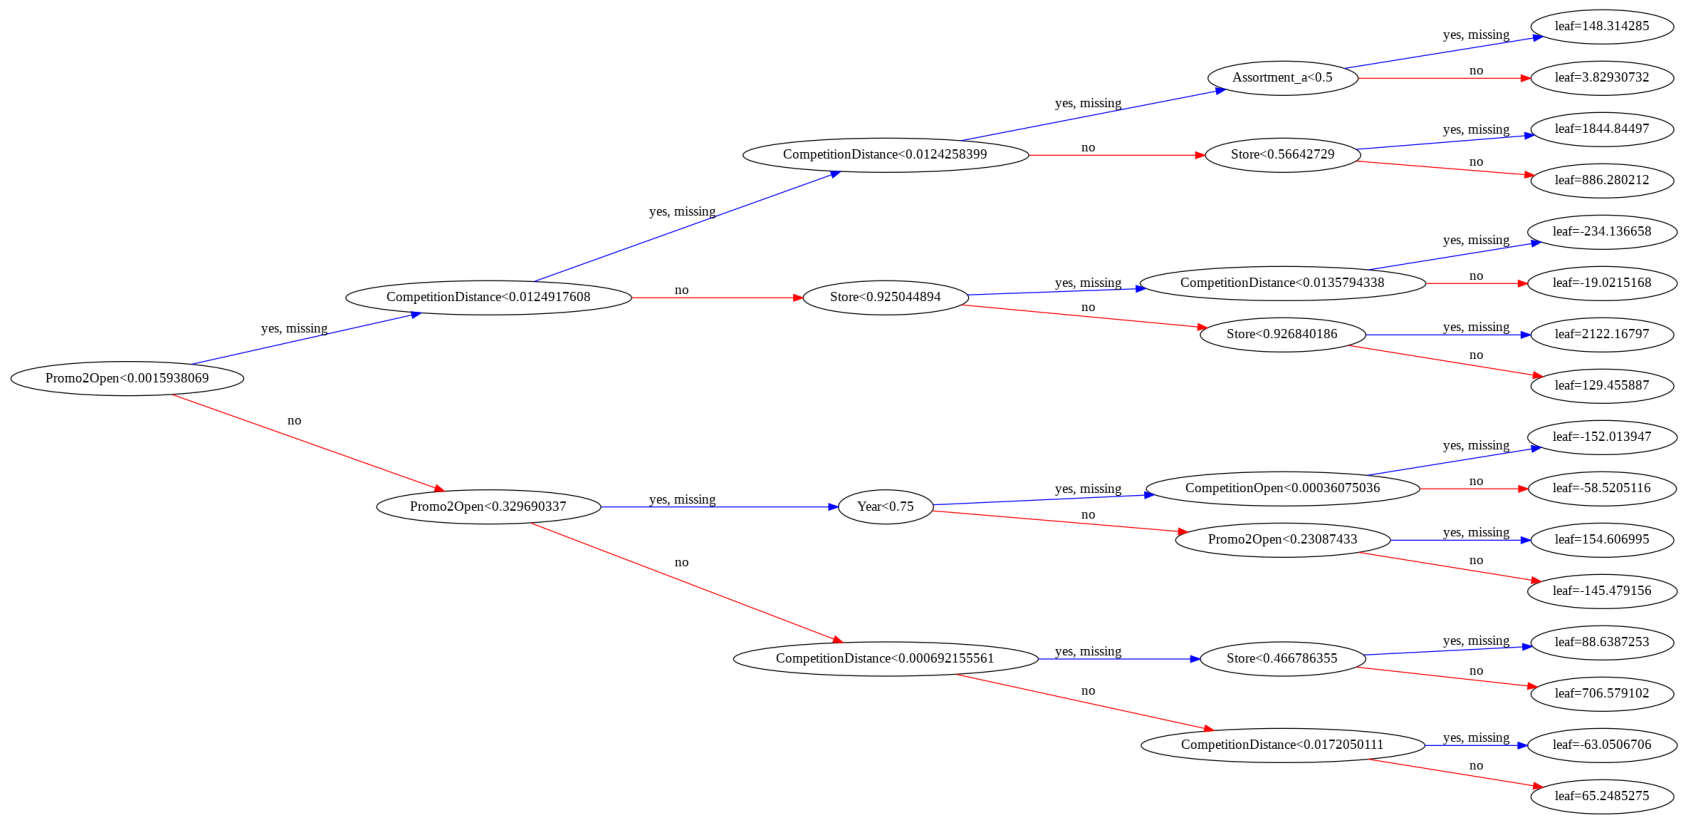

In [55]:
plot_tree(model, rankdir='LR', num_trees=19);
# in the below graph the values of the leaves does not depict the actual sales, it just shows the deviation from the average which we're predicting.
# observe everytime the leaves values is decreasing, whihc means, the model is improving and less chnages are to be done.

In [56]:
trees = model.get_booster().get_dump()
# this converts tree into text

In [57]:
len(trees)

20

In [58]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.00135135138] yes=27,no=28,missing=27
				27:le

In [59]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
# since we have computed our model, now lets check the factor which has the maximum impact on our mode.
# so "model.feature_importances_": will give us the information about the feature in our model

In [60]:
importance_df.head(10)

,feature,importance
1,Promo,0.317473
24,StoreType_b,0.086472
12,DayOfWeek_1,0.082269
5,Promo2,0.063986
3,CompetitionDistance,0.045053
29,Assortment_c,0.040226
27,Assortment_a,0.038759
9,Month,0.038493
0,Store,0.038119
8,Day,0.033209


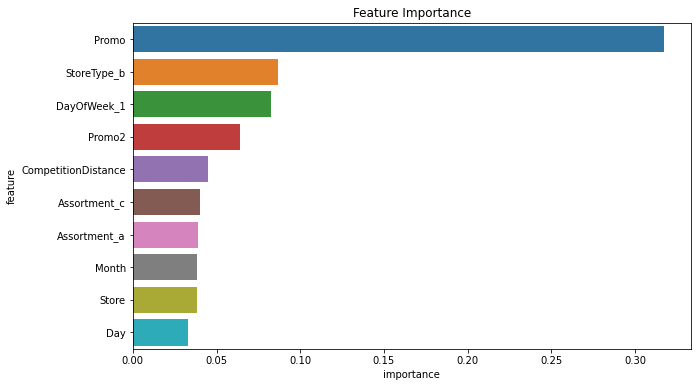

In [61]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [62]:
#since in this model we didn't made validation set, because we're using different techniques this time. i.e. KFold cross validation
#In KFold cross validation: we create batches of a certian proportion Ex. K=5 It means we create 5 folds/ batches of the training data. then we take 5 models and take a 
# a particular batch as a validation batch which we use for hypertuning,etc. the benefir of this technique is that we are not loosing our training data but at the same time
# we can analyse how the model is working. we calculate the validation score to look which batch of the set has the maximum impact in the training.

# idealy the validation set should be close to the real data ex. test set. Since we train our model on the past data and use it to predict the future data, thus the validation set
# should be in the future too. So we have to keep this in mind that when we are woking on a time order data, the validation should be close enough with to the test set.
# apart from that KFold is not suitable for large dataset as it is computationally expensive.
from sklearn.model_selection import KFold

In [63]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [64]:
kfold = KFold(n_splits=5)

In [65]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
# iloc is used to grabs the passed input from the set.

Train RMSE: 2352.216448531526, Validation RMSE: 2424.6228916973314
Train RMSE: 2406.709513789309, Validation RMSE: 2451.9646038059277
Train RMSE: 2365.7354745443067, Validation RMSE: 2336.984157073758
Train RMSE: 2366.4732092777763, Validation RMSE: 2460.8995475901697
Train RMSE: 2379.3752997474626, Validation RMSE: 2440.665320626728


In [66]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
# here we're calculating the average of the outputs predicted by our models. along the axis 0

In [67]:
preds = predict_avg(models, X)

In [68]:
preds

array([8021.374 , 7577.715 , 8747.863 , ..., 7615.0303, 7924.784 ,
       9600.297 ], dtype=float32)



```
Hyperparameter tuning and regulaization
```



In [69]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [70]:
#?XGBRegressor

In [71]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [72]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [77]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))



```
n_estimators

The number of trees to be created. More trees = greater capacity of the model.
```



In [78]:
test_params(n_estimators=10)

Train RMSE: 2338.9086054250865, Validation RMSE: 2355.1805801340465


In [79]:
test_params(n_estimators=30)

Train RMSE: 1798.135204715733, Validation RMSE: 1812.4567936897852


In [80]:
test_params(n_estimators=100)

Train RMSE: 1171.5153732526683, Validation RMSE: 1188.130217942874


In [81]:
test_params(n_estimators=250)
# "n_estimators": means the number og DT, so when we're tuning we need to check in every aspect
#i.e although 250 DT will give less error, but they'll need a alot of time and if the difference between the validation error are 
# niot significant then its not worthy. 

Train RMSE: 888.4643673353082, Validation RMSE: 915.6570107826251




```
**max_depth**

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.
```



In [82]:
test_params(max_depth=2)
# n_estimators: by default its 100

Train RMSE: 2347.243170367382, Validation RMSE: 2356.3725135836835


In [85]:
test_params(max_depth=5, n_estimators=10)

Train RMSE: 2447.9018412639803, Validation RMSE: 2460.399778856268


In [84]:
test_params(max_depth=10,n_estimators=10)

Train RMSE: 1930.2176398347135, Validation RMSE: 1968.623668935091


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [86]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5042.093629559539, Validation RMSE: 5061.617443885448


In [87]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2204.1635515065495, Validation RMSE: 2219.029776805458


In [88]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1544.2943776724633, Validation RMSE: 1559.1296588510822


In [89]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1114.9123279654875, Validation RMSE: 1136.2355182299127


In [90]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1186.7782163315155, Validation RMSE: 1210.6552495975623


## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [91]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)
# "subsample = 0.9": means our model will only take 90% of the rows randomly chosen
# "colsample_bytree=0.7": means our model will only take 70% of the rows

In [92]:
%%time
model.fit(X, targets)

CPU times: user 1h 4min 26s, sys: 6.81 s, total: 1h 4min 32s
Wall time: 34min 46s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [93]:
test_preds = model.predict(X_test)

In [94]:
submission_df['Sales']  = test_preds

In [95]:
test_df.Open.isna().sum()

11

In [96]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)
# if we remember we removed the cols where the store were closed i.e. open=0, so our model assumes that no store is closed, but in the final
# submission file we need to adjust our predictions. so to handle it we're simply multiplying our prections with the open
# so if the store is closed it will show the sales =0.

In [97]:
submission_df


,Id,Sales
0,1,4019.284180
1,2,7939.463867
2,3,8856.521484
3,4,7023.802246
4,5,7157.030273
...,...,...
41083,41084,2339.857666
41084,41085,7730.162109
41085,41086,7286.134277
41086,41087,21661.806641


In [98]:
submission_df.to_csv('submission.csv', index=None)